In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sb

In [2]:
from lib_analytics import showInfoDataFrame, displaySideBySide, showComponentOfColumn

In [3]:
data_original = pd.read_csv("data_preprocessing/data_final.csv", index_col=0)
data_original.shape

(707, 11)

In [14]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 707 entries, 0 to 706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ma_Tinh          707 non-null    float64
 1   Name             707 non-null    object 
 2   Nam              707 non-null    float64
 3   Thang            707 non-null    float64
 4   So_Diem_Chay     707 non-null    float64
 5   Air_Humidity     707 non-null    float64
 6   Air_Temperature  707 non-null    float64
 7   Rainfull         707 non-null    float64
 8   Sunshine         707 non-null    float64
 9   Latitude         707 non-null    float64
 10  Longitude        707 non-null    float64
dtypes: float64(10), object(1)
memory usage: 66.3+ KB


In [4]:
tuple_name = set(
    data_original.Name  
)
print(tuple_name)

{'Cà Mau', 'Vinh', 'Vũng Tàu', 'Nam Định', 'Tuyên Quang', 'Hà Nội', 'Lai Châu', 'Đà Nẵng', 'Sơn La', 'Huế'}


In [10]:
df = data_original[data_original.Name == 'Cà Mau']

In [19]:
columns = [
    'Ten Tinh', 
    'So_Diem_Chay VS Sunshine', 
    'So_Diem_Chay VS Air_Humidity', 
    'So_Diem_Chay VS Air_Temperature', 
    'So_Diem_Chay VS Rainfull', 
]
df_corr = pd.DataFrame(columns=columns)
for name in tuple_name:
    df = data_original[data_original.Name == name]
    new_row = pd.Series(
        data = {
            columns[0]: name,
            columns[1]: df.So_Diem_Chay.corr(df.Sunshine),
            columns[2]: df.So_Diem_Chay.corr(df.Air_Humidity),
            columns[3]: df.So_Diem_Chay.corr(df.Air_Temperature),
            columns[4]: df.So_Diem_Chay.corr(df.Rainfull)
        }
    )
    df_corr = df_corr.append(new_row, ignore_index=True)
df_corr

,Ten Tinh,So_Diem_Chay VS Sunshine,So_Diem_Chay VS Air_Humidity,So_Diem_Chay VS Air_Temperature,So_Diem_Chay VS Rainfull
0,Cà Mau,0.362110,-0.254585,0.038536,-0.285190
1,Vinh,-0.023563,0.256171,-0.129996,-0.214401
2,Vũng Tàu,0.398424,-0.192095,0.129836,-0.187174
3,Nam Định,0.014032,0.260376,0.131842,0.129343
4,Tuyên Quang,-0.122084,-0.032917,-0.008745,-0.156677
5,Hà Nội,0.188601,0.140612,0.507407,0.486746
6,Lai Châu,0.294777,-0.227687,0.059148,-0.137159
7,Đà Nẵng,0.192555,0.037235,-0.102327,-0.192353
8,Sơn La,0.235918,-0.393555,0.101222,-0.111307
9,Huế,0.094616,0.065505,-0.029799,-0.159776


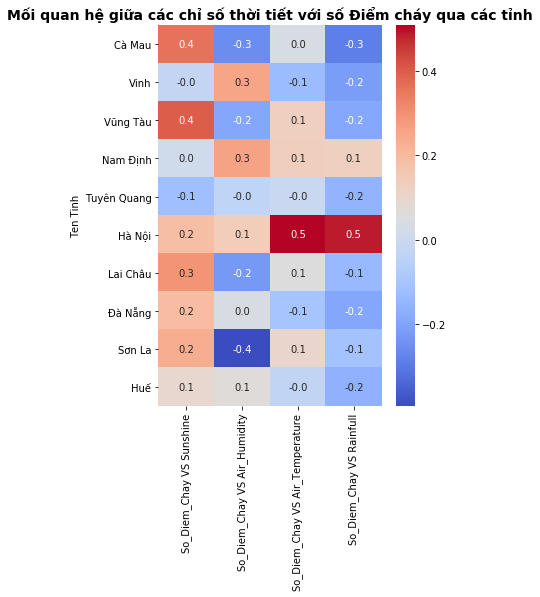

In [21]:
df_corr_show = df_corr.set_index('Ten Tinh')
plt.figure(figsize=(5, 7))
sb.heatmap(
    df_corr_show,
    annot=True,
    fmt='0.1f',
    cmap='coolwarm'
)
plt.title('Mối quan hệ giữa các chỉ số thời tiết với số Điểm cháy qua các tỉnh', fontweight='bold', fontsize=14)
plt.show()